# FreshHarvest Data Exploration
## Fruit Freshness Classification Dataset Analysis

This notebook explores the FreshHarvest dataset for fruit freshness classification.
The dataset contains images of 8 different fruits in fresh and spoiled conditions.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
import yaml
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Dataset Structure Analysis

In [3]:
# Load configuration
with open('../config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Dataset path
data_path = Path('../data')
print(f"Dataset path: {data_path}")
print(f"Dataset exists: {data_path.exists()}")

# List all directories
if data_path.exists():
    class_dirs = [d for d in data_path.iterdir() if d.is_dir()]
    print(f"\nFound {len(class_dirs)} class directories:")
    for class_dir in sorted(class_dirs):
        print(f"  - {class_dir.name}")
else:
    print("Dataset path does not exist!")

Dataset path: ..\data
Dataset exists: True

Found 20 class directories:
  - external
  - F_Banana
  - F_Lemon
  - F_Lulo
  - F_Mango
  - F_Orange
  - F_Strawberry
  - F_Tamarillo
  - F_Tomato
  - interim
  - processed
  - raw
  - S_Banana
  - S_Lemon
  - S_Lulo
  - S_Mango
  - S_Orange
  - S_Strawberry
  - S_Tamarillo
  - S_Tomato


In [4]:
# Count images per class
class_counts = {}
total_images = 0

for class_dir in sorted(class_dirs):
    image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))
    count = len(image_files)
    class_counts[class_dir.name] = count
    total_images += count
    print(f"{class_dir.name}: {count} images")

print(f"\nTotal images: {total_images}")
print(f"Average images per class: {total_images / len(class_dirs):.1f}")

external: 0 images
F_Banana: 1000 images
F_Lemon: 1000 images
F_Lulo: 1000 images
F_Mango: 1000 images
F_Orange: 1000 images
F_Strawberry: 1000 images
F_Tamarillo: 1000 images
F_Tomato: 1000 images
interim: 0 images
processed: 0 images
raw: 0 images
S_Banana: 1000 images
S_Lemon: 1000 images
S_Lulo: 1000 images
S_Mango: 1000 images
S_Orange: 1000 images
S_Strawberry: 1000 images
S_Tamarillo: 1000 images
S_Tomato: 1000 images

Total images: 16000
Average images per class: 800.0


## 2. Data Distribution Visualization

Dataset Distribution:
           Class  Count       Fruit Condition
1       F_Banana   1000      Banana     Fresh
2        F_Lemon   1000       Lemon     Fresh
3         F_Lulo   1000        Lulo     Fresh
4        F_Mango   1000       Mango     Fresh
5       F_Orange   1000      Orange     Fresh
6   F_Strawberry   1000  Strawberry     Fresh
7    F_Tamarillo   1000   Tamarillo     Fresh
8       F_Tomato   1000      Tomato     Fresh
12      S_Banana   1000      Banana   Spoiled
13       S_Lemon   1000       Lemon   Spoiled
14        S_Lulo   1000        Lulo   Spoiled
15       S_Mango   1000       Mango   Spoiled
16      S_Orange   1000      Orange   Spoiled
17  S_Strawberry   1000  Strawberry   Spoiled
18   S_Tamarillo   1000   Tamarillo   Spoiled
19      S_Tomato   1000      Tomato   Spoiled


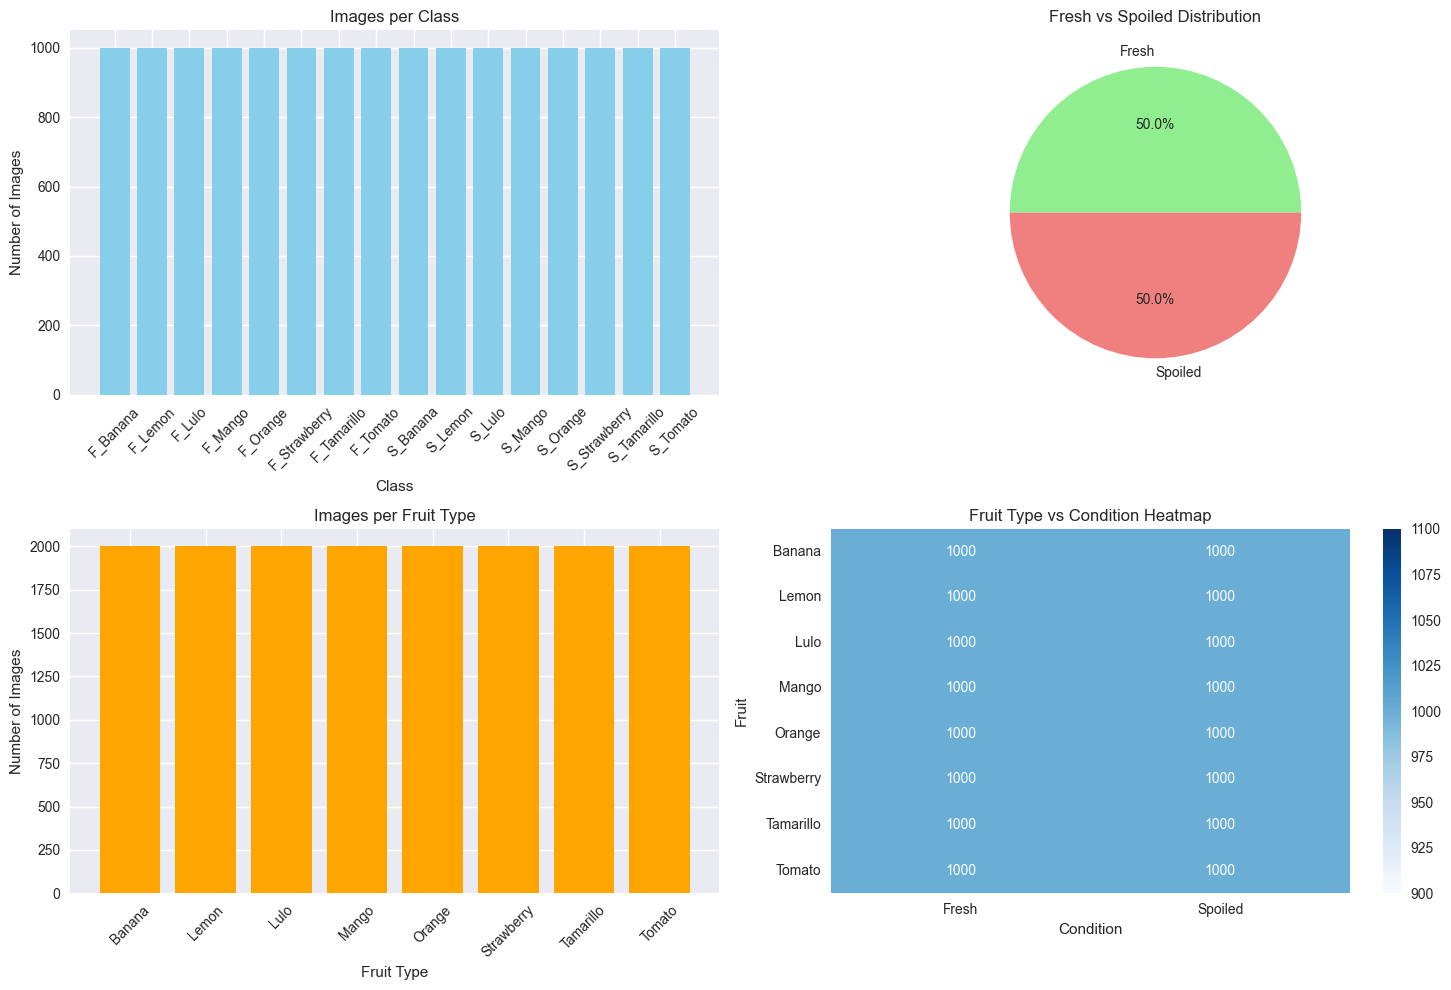

In [6]:
# Create DataFrame for visualization
df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
df_counts['Fruit'] = df_counts['Class'].str[2:]  # Remove F_ or S_ prefix
df_counts['Condition'] = df_counts['Class'].str[0].map({'F': 'Fresh', 'S': 'Spoiled'})

# Filter out invalid classes (those that don't start with F_ or S_)
df_counts = df_counts.dropna(subset=['Condition'])
df_counts = df_counts[df_counts['Count'] > 0]  # Remove zero count entries

print("Dataset Distribution:")
print(df_counts)

# Plot class distribution
plt.figure(figsize=(15, 10))

# Subplot 1: Overall class distribution
plt.subplot(2, 2, 1)
plt.bar(df_counts['Class'], df_counts['Count'], color='skyblue')
plt.title('Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Subplot 2: Fresh vs Spoiled distribution
plt.subplot(2, 2, 2)
condition_counts = df_counts.groupby('Condition')['Count'].sum()
plt.pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%',
         colors=['lightgreen', 'lightcoral'])
plt.title('Fresh vs Spoiled Distribution')

# Subplot 3: Fruit type distribution
plt.subplot(2, 2, 3)
fruit_counts = df_counts.groupby('Fruit')['Count'].sum()
plt.bar(fruit_counts.index, fruit_counts.values, color='orange')
plt.title('Images per Fruit Type')
plt.xlabel('Fruit Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Subplot 4: Heatmap of fruit vs condition
plt.subplot(2, 2, 4)
pivot_df = df_counts.pivot(index='Fruit', columns='Condition', values='Count')
pivot_df = pivot_df.fillna(0).astype(int)  # Fill NaN with 0 and convert to int
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='Blues')
plt.title('Fruit Type vs Condition Heatmap')

plt.tight_layout()
plt.show()

## 3. Sample Image Visualization

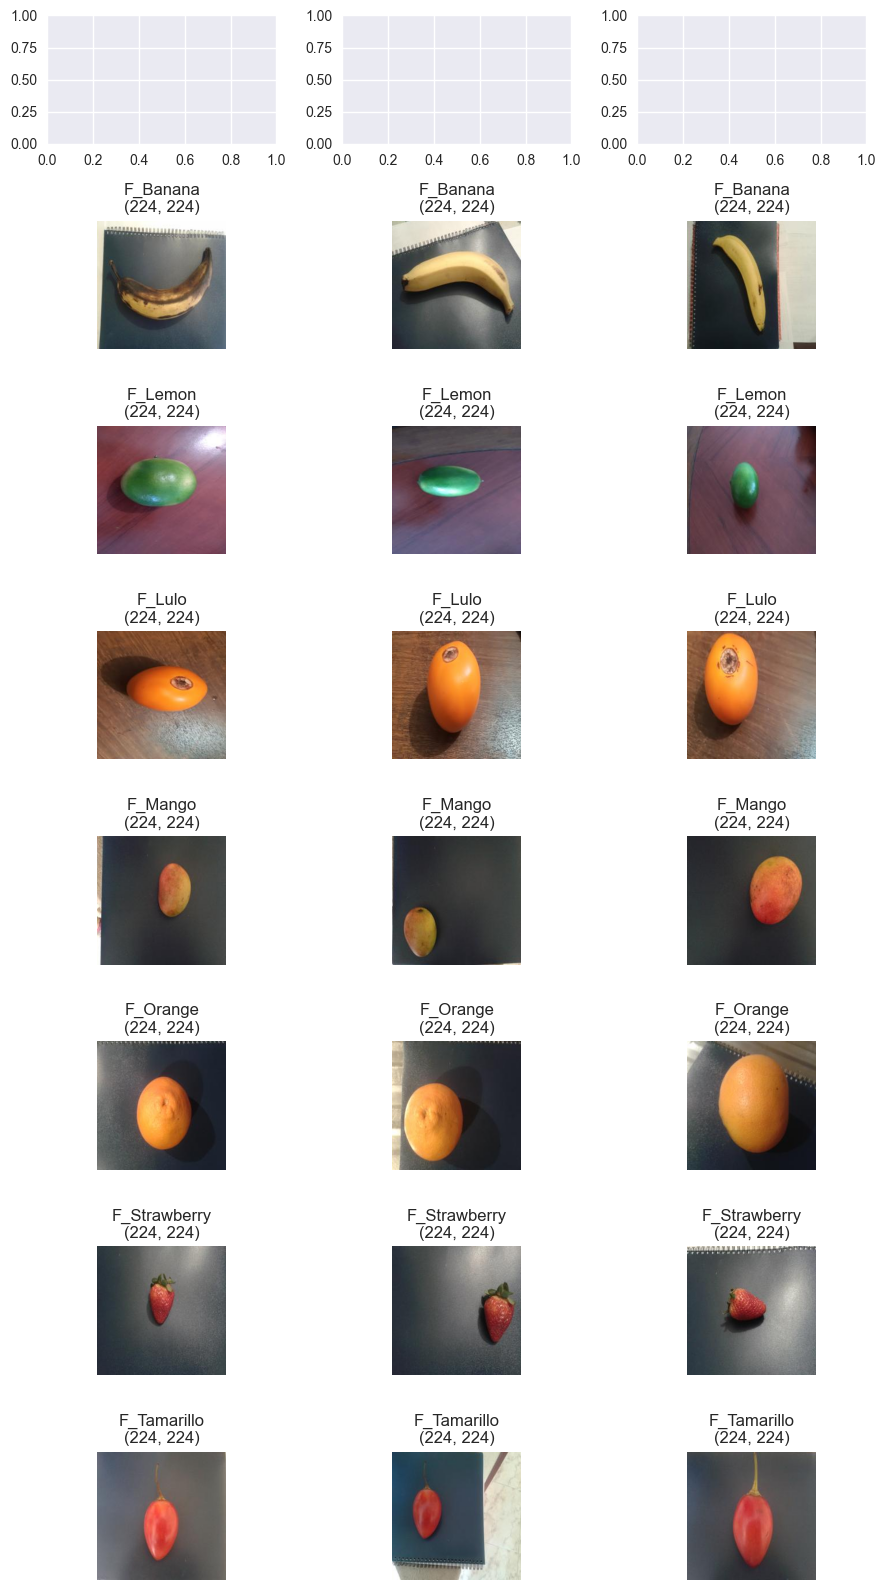

In [ ]:
# Function to display sample images
def display_sample_images(class_dirs, samples_per_class=2):
    fig, axes = plt.subplots(len(class_dirs), samples_per_class, 
                            figsize=(samples_per_class * 3, len(class_dirs) * 2))
    
    for i, class_dir in enumerate(sorted(class_dirs)):
        image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))
        
        for j in range(min(samples_per_class, len(image_files))):
            img_path = image_files[j]
            img = Image.open(img_path)
            
            if len(class_dirs) == 1:
                ax = axes[j]
            else:
                ax = axes[i, j] if samples_per_class > 1 else axes[i]
            
            ax.imshow(img)
            ax.set_title(f'{class_dir.name}\n{img.size}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images (first 8 classes to avoid overcrowding)
sample_classes = class_dirs[:8]
display_sample_images(sample_classes, samples_per_class=3)

## 4. Image Properties Analysis

Image Properties Summary:
       width  height     file_size
count  800.0   800.0    800.000000
mean   224.0   224.0   6334.867500
std      0.0     0.0   2046.780042
min    224.0   224.0   2709.000000
25%    224.0   224.0   4873.250000
50%    224.0   224.0   6106.000000
75%    224.0   224.0   7538.250000
max    224.0   224.0  11708.000000


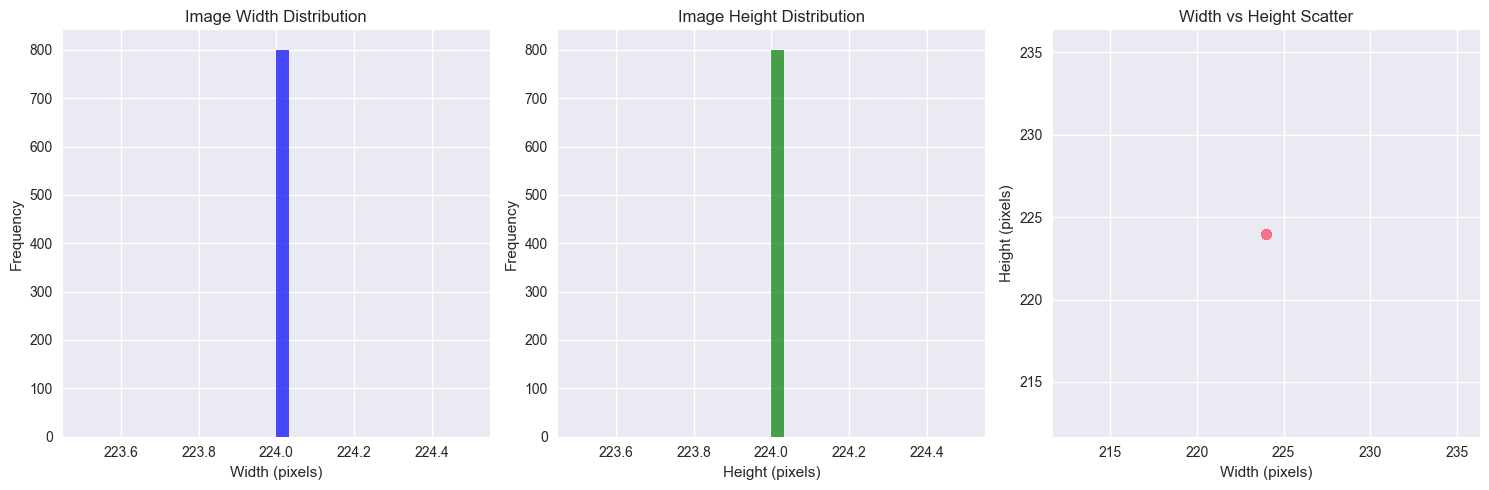

In [ ]:
# Analyze image properties
def analyze_image_properties(class_dirs, sample_size=100):
    properties = []
    
    for class_dir in class_dirs:
        image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))
        
        # Sample random images
        sample_files = np.random.choice(image_files, 
                                      min(sample_size, len(image_files)), 
                                      replace=False)
        
        for img_path in sample_files:
            try:
                img = Image.open(img_path)
                properties.append({
                    'class': class_dir.name,
                    'width': img.size[0],
                    'height': img.size[1],
                    'mode': img.mode,
                    'file_size': img_path.stat().st_size
                })
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    return pd.DataFrame(properties)

# Analyze properties
props_df = analyze_image_properties(class_dirs, sample_size=50)
print("Image Properties Summary:")
print(props_df.describe())

# Visualize image dimensions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(props_df['width'], bins=30, alpha=0.7, color='blue')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(props_df['height'], bins=30, alpha=0.7, color='green')
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(props_df['width'], props_df['height'], alpha=0.6)
plt.title('Width vs Height Scatter')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()